<a href="https://colab.research.google.com/github/elevien/math50/blob/main/hello_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd # for working with data
%config InlineBackend.figure_format = "svg"

# Introduction



In In this notebook, we will learn how to implement a simple linear regression in python notebook, we will learn how to implement a simple linear regression in pythonIn this notebook, we will learn how to implement a simple linear regression in python. The basic idea of a linear regression (or really any regression model) is that we make some observation ${\bf y} = (y_1,y_2,\dots,y_N)^T$ corresponding to another set of observation ${\bf x} = (x_1,\dots,x_N)^T$. What we are interested in, is the relaltionship between $x$ and $y$. The goal is often to make predictions about the value of $y$ corresponding to some $x$ we did not measure. Or, we might be interested in a causal relationship between $x$ and $y$. For a linear regression model, we will *assume* that the relationship between $x$ and $y$ is linear:
\begin{equation}
y = ax + b. 
\end{equation}

What we want to learn: 
* How do we find $a$ and $b$ from the data? We will mostly be doing this with a computer, but it's good to understand the theory (the equations) as well. 
* What assumptions do we make when we obtian these estimates of $a$ and $b$? What happens if the assumptions are not satisfied in the real data? (they never are!)
* Once we find $a$ and $b$, how do we quantify the uncertianty in our estimates? 




**Reading**

 Gleman, Hill and Vehtari - Chap. 6, 7 and 8

 <a href = "https://www.bostonglobe.com/2020/06/11/opinion/statistical-paradox-police-killings/"> The statistical paradox of police killings </a>

**Due date**

 TBD


# Performing a linear regression on fake data

 Whenever I learn a new statistical technique, I always like to start with fake, or simulated data. When we use simulated data, we know the growth truth and can therefore see exactly what aspects of the data the method can and cannot help us understand. Generating fake data also forces us to make our assumptions explicit. For now, let's generate fake data which obeys the assumptions of a linear regression (what are these assumptions?)




In [ ]:
# we already saw this in the first python notebook
# but here is a fake linear regression data
x = np.linspace(0,1,5)
a = 1.  # the slope
b = 2. # the intercept
sigma = 0.1
y = a*x + b + np.random.normal(0,sigma,len(x)) 

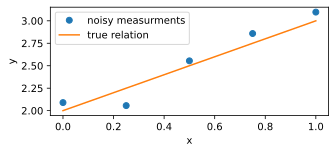

In [ ]:
fig,ax = plt.subplots(figsize=(5,2))
ax.plot(x,y,"o",label="noisy measurments")
ax.plot(x,a*x + b,"-",label="true relation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [ ]:
# we will use the statsmodels package imported above to fit the linear regression 
# the command is sm.OLS(y, X), you can check out the help by typing help(sm.OLS)
# and you'll see there is a lot going on, the import thing is the parameters.
 
# We need to give OLS y, the observed or response variable, and x, the input variable. 
# but it likes the input to be in a matrix form where each row contains the numbers 
# that appear in front of the coefficents a,b
X = sm.add_constant(x)
X

array([[1.  , 0.  ],
       [1.  , 0.25],
       [1.  , 0.5 ],
       [1.  , 0.75],
       [1.  , 1.  ]])

In [ ]:
 # this first command creates the "model" object, which is all the information 
 # about the data and the statistical model (linear regression)
 # (compare this to r code in the textbook)
 model= sm.OLS(y,X) 
 # and this commend actually does the computations which give the results
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     46.24
Date:                Tue, 27 Jul 2021   Prob (F-statistic):            0.00650
Time:                        00:46:07   Log-Likelihood:                 4.5783
No. Observations:                   5   AIC:                            -5.157
Df Residuals:                       3   BIC:                            -5.938
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9288      0.097     19.916      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [ ]:
# there is lot going on here, but the most important thing is 
# the parameters cont (the intercept b) and x1 (the slope)
# we can get these using the params attribute of results:
b_fit,a_fit = results.params

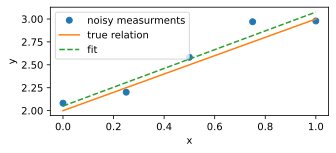

In [ ]:
# now let's plot it and compare to the data
fig,ax = plt.subplots(figsize=(5,2))
ax.plot(x,y,"o",label="noisy measurments")
ax.plot(x,a*x + b,"-",label="true relation")
ax.plot(x,a_fit*x + b_fit,"--",label="fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [ ]:
results.rsquared

0.9365559518408088

**EXERCISES**

1.  Using the code above, write a function `simulated_data_lr(a,b,sigma,n)` which does the following: First, it generates data from a simulated linear regression with slope a, intercept b, measurment noise sigma and n data points. It then performs a linear regression on the simulated data and outputs the estimated slope, intercept, the $R^2$ value, the $p$-value and the F statistic. 
2. Make a plot of the p-value vs. n using the values of a, b and sigma from above. Make the same plot with $a = 0.1$
3. Repeat 2. but plotting $R^2$ instead of the $p$-values
4. Try to understand the behavoir in the plots above. How does these plots make sense in light of the different meanings of $R^2$ and the $p$-value. What might be a reason to use one over the other?  





In [ ]:
def sim(a,b,sigma,n):
  x = np.linspace(0,1,n)
  y = a*x + b + np.random.normal(0,sigma,len(x)) 
  X = sm.add_constant(x)
  model= sm.OLS(y,X) 
 # and this commend actually does the computations which give the results
  results = model.fit() 
  return results.rsquared


In [ ]:
n_range = np.linspace(2,500,100,dtype=int)
rsquareds = [sim(0,1,0.5,n) for n in n_range]

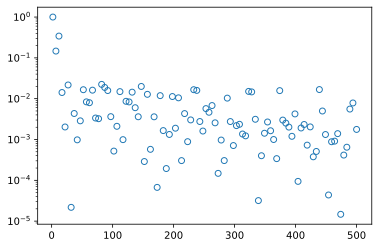

In [ ]:
n_range = np.linspace(2,500,100,dtype=int)
rsquareds = [sim(0,1,0.5,n) for n in n_range]

plt.semilogy(n_range,rsquareds,'o',fillstyle="none")

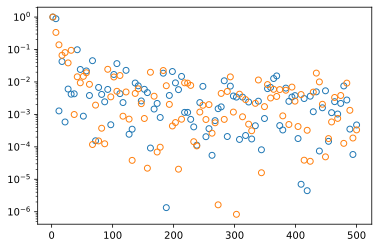

In [ ]:
n_range = np.linspace(2,500,100,dtype=int)
rsquareds = [sim(0,0.1,0.5,n) for n in n_range]
plt.semilogy(n_range,rsquareds,'o',fillstyle="none")

n_range = np.linspace(2,500,100,dtype=int)
rsquareds = [sim(0,1,0.5,n) for n in n_range]

plt.semilogy(n_range,rsquareds,'o',fillstyle="none")

# Election and economy

In [ ]:
url = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
data = pd.read_csv(url,sep="\s+");
data

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon
5,1972,3.62,61.79,Nixon,McGovern
6,1976,1.08,48.95,Ford,Carter
7,1980,-0.39,44.70,Carter,Reagan
8,1984,3.86,59.17,Reagan,Mondale
9,1988,2.27,53.94,"Bush, Sr.",Dukakis


In [ ]:
# in this case our x variable is economic growth 
x = data.growth
y = data.vote

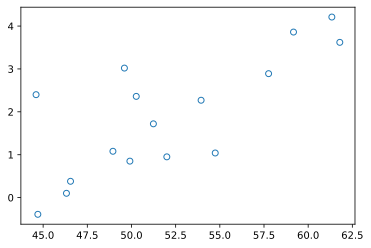

In [ ]:
plt.plot(y,x,"o",fillstyle="none")

**EXERCISES**

1.  Perform a linear regression on vote share vs. economic growth. 
2. In the previous example, we discussed we applied the linear regression in an idealized sceneario where the data satisfied exactly the assumptions of the linear model. In what ways might this data set violate the assumptions of the linear regression? To answer this question, think about how the $x$ and $y$ variabls are measured. 
3. Generate many simulations of data with zero slope and roughly the same amount of noise and data points as the real data. How likely is it that the slope in the real data is within one standard deviation of the simulated data? 
4. Repeat (3), but 
5. What other information might be relavent that we are not using? 

# Test scores and mother education



So far we have been working with regression problems where the predictor variables (x) are continous, that is, they are decimal numbers. It's comment however to make preditions based on discrete variables. For example, we might want to understand how the efficacy of a drug depends on the sex of a patient. Such variables are sometimes called idicator variables. Everything we've done actually generalizes very easily to this setting -- remember, there was nothing in our model that assumes $x$ is continous. 

To illusrate this, we will work with a data consisting of kids test scores and their mother's high school education (whether they graduated or not). Acutally, there is more information in this data set, but for now, we will only focus on this one variable. 

In [31]:
data = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/KidIQ/data/kidiq.csv")

In [32]:
data

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [33]:
# there is more information here, but let's start by just looking at 
# how the mother's high school education correlates with scores
x = np.array(data["mom_hs"])
y = np.array(data["kid_score"])



In [34]:
model= sm.OLS(y,sm.add_constant(x)) 
 # and this commend actually does the computations which give the results
results = model.fit()

In [35]:
# as expected everything works just the same as before
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           5.96e-07
Time:                        15:35:22   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.5484      2.059     37.670      0.0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[]

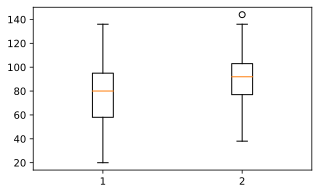

In [36]:
# plotting this data is a little different than we are used to with continous predictors
# if we just plot as usual, we get something that is a little difficult to interpret
# instead, we will use a boxplot. The boxplot takes a list of lists, and plots 
# the mean and standard deviation of each element in this list
fig,ax = plt.subplots(figsize=(5,3))
plt.boxplot([y[x ==0],y[x ==1]]);

b_fit,a_fit = results.params
plt.plot()

**EXERCISES**
1. Write a function to generate fake data which looks like the test score data (just the test scores and mother high school idicator) and perform the regression. You will want to use the python function `np.random.choice` to generate the mother's high school eduation. 
2. Now, pretend that, in addition to whether the mother attended high school, we also know whether the mother attended college. 